In [3]:
import gzip
import os
from urllib.request import urlretrieve
import numpy as np

from convenience_functions import get_mnist

from NetworkModules.Network import Network
from NetworkModules.Layers import *
from NetworkModules.Activations import *
from NetworkModules.LossFunctions import *  


import matplotlib.pyplot as plt
import time


# MNIST Dataset

In [4]:
train_X, train_Y, test_X, test_Y = get_mnist("C:/Users/nisha/project_repositories/MNIST_from_scratch/MNIST_From_Scratch/dataset")


print(f'Train X shape = {train_X.shape}')
print(f'Train Y shape = {train_Y.shape}')
print(f'Test  X shape  = {test_X.shape}')
print(f'Test  Y shape  = {test_Y.shape}')


sample = np.random.randint(60000)
image = train_X[sample].reshape(28, 28)
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.title(f'This image is a {int(np.argwhere(train_Y[sample]== 1))}')
plt.show()

Train X shape = (60000, 784)
Train Y shape = (60000, 10)
Test  X shape  = (10000, 784)
Test  Y shape  = (10000, 10)


In [6]:
net = Network()

# Sequentially decide network architecture
net.add_layer(FullyConnectedLinearLayer(784, 300))                                  
net.add_layer(ActivationLayer(relU, drelU), dropout_layer=True, keep_prob=0.8)
net.add_layer(FullyConnectedLinearLayer(300, 150))
net.add_layer(ActivationLayer(relU, drelU), dropout_layer=True, keep_prob=0.8)
net.add_layer(FullyConnectedLinearLayer(150, 10))
net.add_layer(ActivationLayer(softmax, dsoftmax))


# Chose the loss function to be used
net.set_loss(cross_entropy_loss, dcross_entropy_loss)

# Load the training data
net.load_data( train_X[0:60000,:].T, train_Y[0:60000,:].T, test_X[0:10000,:].T, test_Y[0:10000,:].T)

# Weight initialization
net._reinitalize_weights()


# Define an accurace metric to evaluate performance (not the objective function)
def accuracy_metric(X, Y):
    return (np.argmax(net.inference(X), axis=0) == np.argmax(Y, axis=0)).sum() / Y.shape[1] * 100

net.add_accurace_function(accuracy_metric)

t0 = time.time()
net._mini_batch_Adam(learning_rate=0.001, epochs = 15, batch_size = 128, L2_reg = True, L2_lambda = 0.01, adaptive_learning_rate='scheduled', schedule_interval=5, decay_rate=0.5)
print(f'Time of Execution {(time.time() - t0)/60}')


iter       Loss          learn rate      Train Accuracy        Val Accuracy
1          0.53               0.001               91.82               91.77
5          0.27               0.001               93.41               93.15
Training Complete
Time of Execution 0.8059397021929423


# Best case dont touch

In [15]:
net = Network()
net.add_layer(FullyConnectedLinearLayer(784, 300))
net.add_layer(ActivationLayer(relU, drelU), dropout_layer=True, keep_prob=0.8)
net.add_layer(FullyConnectedLinearLayer(300, 150))
net.add_layer(ActivationLayer(relU, drelU), dropout_layer=True, keep_prob=0.8)
net.add_layer(FullyConnectedLinearLayer(150, 10))
net.add_layer(ActivationLayer(softmax, dsoftmax))

net.set_loss(cross_entropy_loss, dcross_entropy_loss)

net.load_data( train_X[0:60000,:].T, train_Y[0:60000,:].T, test_X[0:10000,:].T, test_Y[0:10000,:].T)

net._reinitalize_weights()

def accuracy_metric(X, Y):
    return (np.argmax(net.inference(X), axis=0) == np.argmax(Y, axis=0)).sum() / Y.shape[1] * 100

net.add_accurace_function(accuracy_metric)


net._mini_batch_Adam(learning_rate=0.001, epochs = 20, batch_size = 128, L2_reg = True, L2_lambda = 0.01, adaptive_learning_rate='scheduled', schedule_interval=5, decay_rate=0.3)



iter       Loss          learn rate      Train Accuracy        Val Accuracy
1          0.53               0.001               92.01               92.05
6          0.28             0.00077               93.72               93.51
11         0.28             0.00062               93.83               93.66
16         0.28             0.00053               93.93               93.56
20         0.28             0.00053               93.95               93.64
Training Complete


In [7]:
total_parms = 0

for layer in net.layers:
    if isinstance(layer, FullyConnectedLinearLayer):
        total_parms += np.prod(layer.weights.shape) + np.prod(layer.biases.shape)
        print(np.prod(layer.weights.shape) + np.prod(layer.biases.shape))


# Validation data where the model fails

wrong_examples = np.where(np.argmax(net.inference(test_X.T), axis=0) != np.argmax(test_Y.T, axis=0))[0]



print(f'This model has {total_parms} trained parameters')

235500
45150
1510
This model has 282160 trained parameters


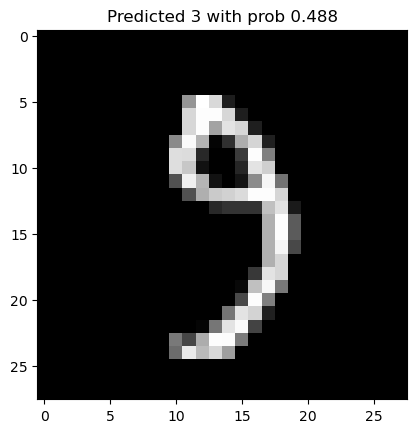

Apparantly this is 9


In [13]:
import matplotlib.pyplot as plt

# pick a sample to plot
sample = np.random.choice(wrong_examples, 1)
image = test_X[sample].reshape(28, 28)

example = test_X[sample].reshape(784, 1)
y_out= net.inference(example)

ind = np.argmax(y_out)
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')

plt.title(f'Predicted {ind} with prob {round(float(y_out[ind]),3)}')
plt.show()

print(f'Apparantly this is {np.argmax(test_Y[sample])}')

# Individual Assignment Data


In [2]:
from scipy.io import loadmat

dat = {}


NN_data = loadmat('dataset/NN_proj_data_10.mat', mdict = dat)
# NN_data = loadmat('dataset/NN_proj_data_04.mat', mdict = dat)


# Dan data

In [12]:
x_train = dat['inp_train']
y_train = dat['y10']

x_valid = dat['inp_valid']
y_valid = dat['y10val']

net = Network()
net.add_layer(FullyConnectedLinearLayer(1, 50))
net.add_layer(ActivationLayer(relU, drelU), dropout_layer=False, keep_prob= 0.95)
net.add_layer(FullyConnectedLinearLayer(50, 25))
net.add_layer(ActivationLayer(tanh, dtanh), dropout_layer=False, keep_prob= 0.95)
net.add_layer(FullyConnectedLinearLayer(25, 1))




net._reinitalize_weights()

net.set_loss(mse_loss, dmse_loss)

net.load_data( x_train, y_train, x_valid, y_valid)


def mse_accuracy(X, Y):
    return np.mean(np.power(net.inference(X) - Y, 2))

net.add_accurace_function(mse_accuracy)

net._mini_batch_Adam(learning_rate=0.001, epochs=1500, batch_size = 16, L2_reg=False, L2_lambda=0.001, adaptive_learning_rate='exponential decay')



iter       Loss          learn rate      Train Accuracy        Val Accuracy
1          1.49               0.001                1.41                1.51
6          0.65               0.001                0.76                0.78
11         0.62               0.001                0.71                0.74
16         0.51               0.001                0.58                0.63
21         0.41               0.001                0.46                 0.6
26          0.3               0.001                0.34                0.66
31         0.22               0.001                0.25                0.87
36         0.18               0.001                 0.2                1.12
41         0.15               0.001                0.18                1.27
46         0.14               0.001                0.16                1.34
51         0.13               0.001                0.15                1.36
56         0.12               0.001                0.14                1.36
61         0

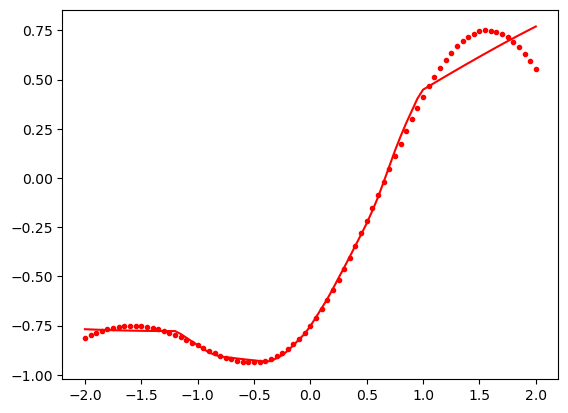

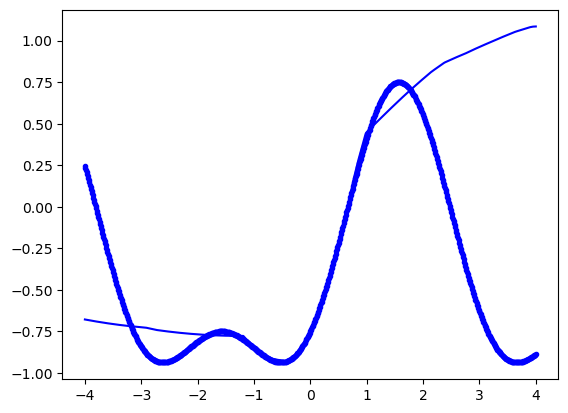

In [13]:
import matplotlib.pyplot as plt

plt.plot(x_train.T, y_train.T, 'r.')
plt.plot(x_train.T, net.inference(x_train).T, 'r')
plt.show()
plt.plot(x_valid.T, y_valid.T, 'b.')
plt.plot(x_valid.T, net.inference(x_valid).T, 'b')
plt.show()

